# Data Analysis using Python
## Analytics Mantra

## Introduction to Linear Regression
**Linear regression

Pros: fast, no tuning required, highly interpretable, well-understood


Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)**

### To predict the sales using Linear Regression?


**Link to Dataset: http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv**

**What are the features?**

**TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
**Radio**: advertising dollars spent on Radio
**Newspaper**: advertising dollars spent on Newspaper

Because the response variable is continuous, this is a regression problem.

There are 200 observations (represented by the rows), and each observation is a single market.

Visualizing data using seaborn
Seaborn: Python library for statistical data visualization built on top of Matplotlib

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
data.shape

(200, 5)

In [8]:
import seaborn as sns
%matplotlib inline

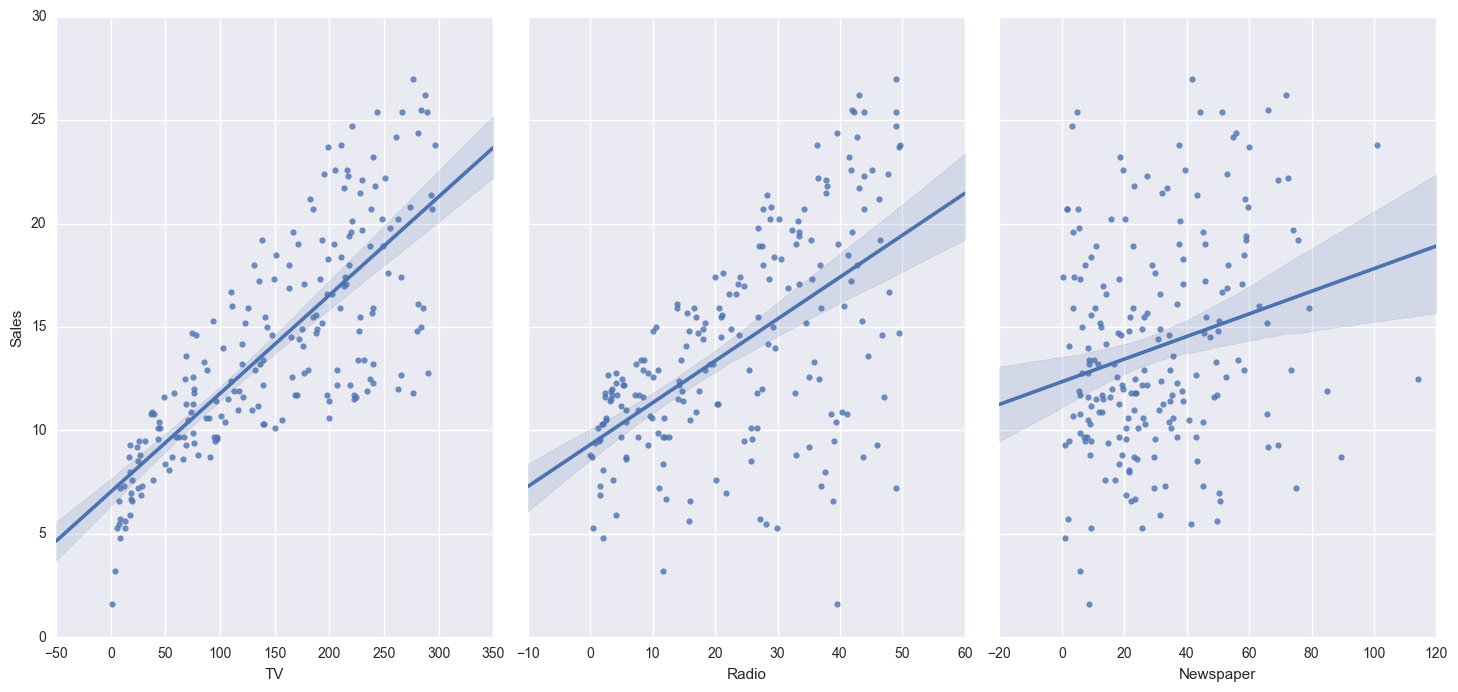

In [9]:
sns.pairplot(data, x_vars=["TV","Radio","Newspaper"], y_vars="Sales", size=7, aspect=0.7, kind = "reg")

In [10]:
feature_cols = ["TV","Radio","Newspaper"]
X = data[feature_cols]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [12]:
y = data["Sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [13]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


# Splitting the X and y into training and test datasets

In [14]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

# Instantiated the Linear Regression Model
linreg = LinearRegression()

# Fit the Model

In [17]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Interpreting various coefficients of the model

In [18]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [19]:
# pair the feature names with the coefficients

list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

# Make Predictions

In [20]:
y_pred = linreg.predict(X_test)

# Compute the RMSE for our sales prediction

In [21]:
import numpy as np
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [25]:
# Feature Extraction
# Calculating the RMSE for another Model
feature_cols = ['TV', 'Radio']
X = data[feature_cols]

y = data.Sales

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.38790346994


## We can say that the new model is more accurate than the previous model.